In [1]:
from pandas import DataFrame
from IPython.display import FileLink

/opt/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /opt/anaconda/lib/python2.7/argparse.pyc, but /opt/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(DESeq2)
library(phyloseq)
library(plyr); library(dplyr)
library(ggplot2)
library(doParallel)
library(foreach)
library(reshape)
library(RColorBrewer)
library(gridExtra)

Loading required package: GenomicRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    duplicated, eval, evalq, Filter, Find, get, intersect, is.unsorted,
    lapply, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rep.int, rownames,
    sapply, setdiff, sort, table, tapply, union, unique, unlist

Loading required package: IRanges
Loading required package: XVector
Loading required package: Rcpp
Loading required package: RcppArmadillo

Attaching 

In [4]:
%%R
dat = read.csv("/home/ashley/priming_exp/df_resp_counts.csv",header=TRUE)

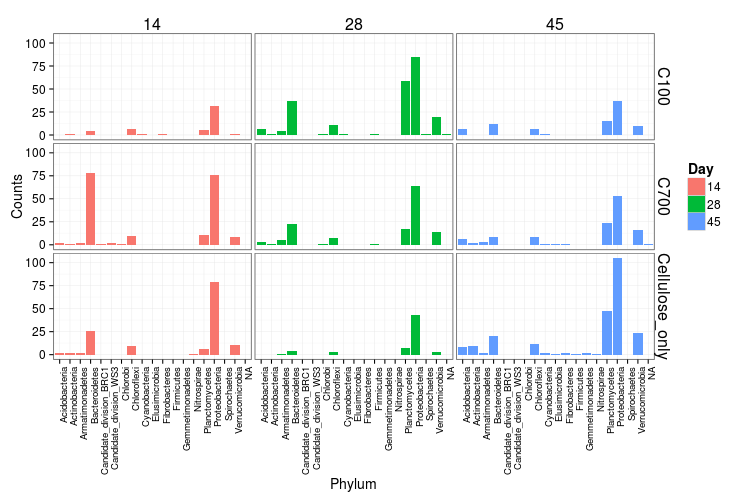

In [5]:
%%R -h 500 -w 750
p = ggplot(dat, aes(y = Counts, x = Phylum, fill = factor(Day)))

p = p + facet_grid(Treatment~Day)

p = p + geom_bar(stat = "identity", position = "dodge")

p = p + theme_bw()

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1), 
              axis.text.y = element_text(size = 12),
              strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.title = element_text(size = 14),
              legend.title = element_text(size = 14),
              legend.text = element_text(size = 12))

p = p + labs(fill = "Day")

p

In [6]:
%%R 
ggsave(plot = p, filename = "figs/Phylum_PE_bar.pdf", width = 12, height = 10)

In [7]:
FileLink("figs/Phylum_PE_bar.pdf")

/home/ashley/priming_exp/figs/Phylum_PE_bar.pdf

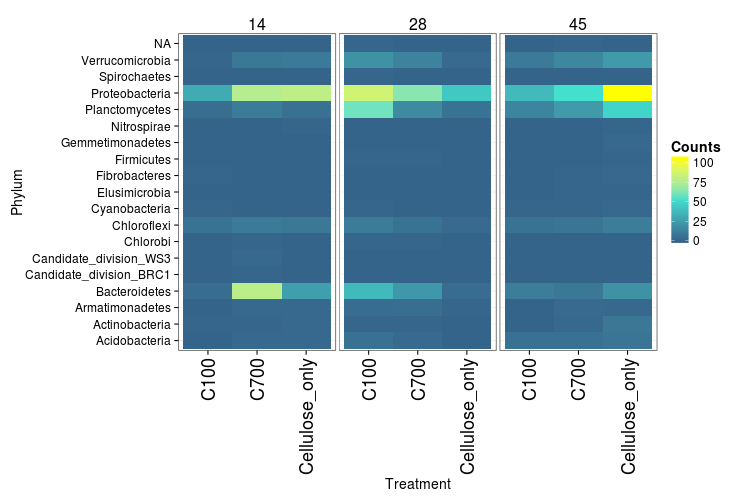

In [8]:
%%R -h 500 -w 750
p = ggplot(dat, aes(fill = Counts, y = Phylum, x = Treatment))

p = p + facet_wrap(~Day)

p = p + geom_tile()           
           
p = p + theme_bw()

p = p + scale_fill_gradientn(colours = c("steelblue4","turquoise","yellow")) #rev(rainbow(2)))

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 18), 
              axis.text.y = element_text(size = 12),
              strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.title = element_text(size = 14),
              legend.title = element_text(size = 14),
              legend.text = element_text(size = 12))

p

In [9]:
%%R 
ggsave(plot = p, filename = "figs/Phylum_PE_heat.pdf", width = 12, height = 10)

In [10]:
FileLink("figs/Phylum_PE_heat.pdf")

/home/ashley/priming_exp/figs/Phylum_PE_heat.pdf